In [1]:
import pandas as pd
import numpy as np



LOADING THE DATA

In [2]:
df=pd.read_csv("news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [4]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [5]:
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
df.tail(5)

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [7]:
df.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [9]:
df.shape

(6335, 4)

In [10]:
df['text'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object>

In [11]:
df.columns=['Index','Title','Text','Label']

In [12]:
df=df.drop(['Index','Title'],axis=1)
df.head(5)

,Text,Label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [13]:
df['Text']=df['Text'].str.lower()
df.head(5)

,Text,Label
0,"daniel greenfield, a shillman journalism fello...",FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,u.s. secretary of state john f. kerry said mon...,REAL
3,"— kaydee king (@kaydeeking) november 9, 2016 t...",FAKE
4,it's primary day in new york and front-runners...,REAL


In [14]:
df['Text']=df['Text'].str.replace(r'https\S+','',regex=True)
df.head()

,Text,Label
0,"daniel greenfield, a shillman journalism fello...",FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,u.s. secretary of state john f. kerry said mon...,REAL
3,"— kaydee king (@kaydeeking) november 9, 2016 t...",FAKE
4,it's primary day in new york and front-runners...,REAL


In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\boyin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
sw=stopwords.words('english')
df['Text']=df['Text'].apply(lambda words:' '.join(word.lower() for word in words.split() if word not in sw))

In [17]:
df.head()

,Text,Label
0,"daniel greenfield, shillman journalism fellow ...",FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,u.s. secretary state john f. kerry said monday...,REAL
3,"— kaydee king (@kaydeeking) november 9, 2016 l...",FAKE
4,primary day new york front-runners hillary cli...,REAL


In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\boyin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
t=nltk.tokenize.WhitespaceTokenizer()
l=nltk.stem.WordNetLemmatizer()
def lt(text):
    return [l.lemmatize(w) for w in t.tokenize(text)]
df['Tokens']=df['Text'].apply(lt)

In [20]:
df.head()

,Text,Label,Tokens
0,"daniel greenfield, shillman journalism fellow ...",FAKE,"[daniel, greenfield,, shillman, journalism, fe..."
1,google pinterest digg linkedin reddit stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,u.s. secretary state john f. kerry said monday...,REAL,"[u.s., secretary, state, john, f., kerry, said..."
3,"— kaydee king (@kaydeeking) november 9, 2016 l...",FAKE,"[—, kaydee, king, (@kaydeeking), november, 9,,..."
4,primary day new york front-runners hillary cli...,REAL,"[primary, day, new, york, front-runner, hillar..."


In [21]:
df['word_length']=df['Text'].str.split().str.len()
df.head()

,Text,Label,Tokens,word_length
0,"daniel greenfield, shillman journalism fellow ...",FAKE,"[daniel, greenfield,, shillman, journalism, fe...",704
1,google pinterest digg linkedin reddit stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st...",254
2,u.s. secretary state john f. kerry said monday...,REAL,"[u.s., secretary, state, john, f., kerry, said...",248
3,"— kaydee king (@kaydeeking) november 9, 2016 l...",FAKE,"[—, kaydee, king, (@kaydeeking), november, 9,,...",263
4,primary day new york front-runners hillary cli...,REAL,"[primary, day, new, york, front-runner, hillar...",190


c:\Users\boyin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

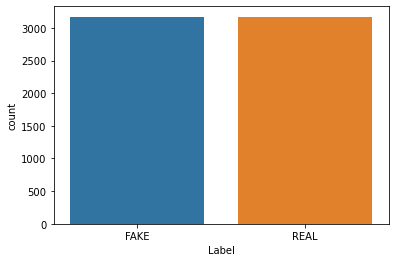

In [22]:
import seaborn as sns
sns.countplot(df['Label'])

In [23]:
df['Label'].value_counts()

REAL    3171
FAKE    3164
Name: Label, dtype: int64

<AxesSubplot:>

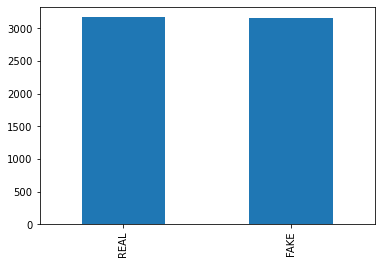

In [24]:
df['Label'].value_counts().plot.bar()

<AxesSubplot:>

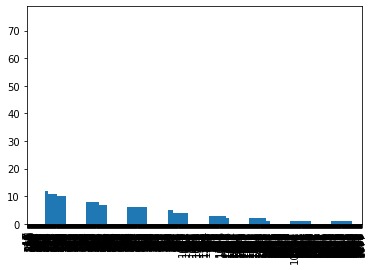

In [28]:
df['word_length'].value_counts().plot.bar()